# Analysis

### Setup

In [1]:
import json
import os
import sys
import pandas as pd
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt

sys.path.append("/Users/frederikespersenknudsen/Local/OrthoIDP/src")
import analyse_data
import analyse_results

## Initial test runs

### CIDER parameters for input data

More on CIDER from Pappu Lab:
- [CIDER](http://pappulab.wustl.edu/CIDER/about/)
- [localCIDER](http://pappulab.github.io/localCIDER/)

In [6]:
# Loading metadata
metadata_path = 'exp/initial/initial.json'
with open(metadata_path, 'r') as file:
    metadata = json.load(file)

# Calculating parameters
params = pd.concat([analyse_data.cider_parameters(cols['sequence'], name) for name, cols in metadata['data'].items()])

# Presenting documentation and results
params.sort_values(by='kappa')

,kappa,FCR,NCPR,Hydrophobicity,Frac. dis. prom.
H1-0_WT,0.154432,0.432432,0.378378,3.249550,0.891892
H1-0_RAND,0.184133,0.432432,0.378378,3.249550,0.891892
H2B_RAND,0.253122,0.485714,0.371429,2.614286,0.942857
H2B_WT,0.301676,0.485714,0.371429,2.614286,0.942857
H2B_CLUST,0.965685,0.485714,0.371429,2.614286,0.942857
H1-0_CLUST,0.994959,0.432432,0.378378,3.249550,0.891892


### $R_g$-distribution of variants

In [2]:
metadata_path = 'exp/initial/initial.json'
results_dir = 'exp/initial/results'

In [4]:
# Loading data metadata for simulation analysis
with open(metadata_path, 'r') as file:
    data = json.load(file)['data']
data = pd.DataFrame(data).transpose()
data

,template,name,species,sequence,region,location,variant
H1-0_WT,H1-0,histone H1.0,Homo sapiens (human),TKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKA...,CTD,[83:194],Wild type
H1-0_RAND,H1-0,histone H1.0,Homo sapiens (human),VADSKKTSAKAKKKKAKPAKRKAPTGKKPSSTAKKKKAPKKKAKLK...,CTD,[83:194],Randomly shuffled
H1-0_CLUST,H1-0,histone H1.0,Homo sapiens (human),KKKRKKKKKKKKKKKKKKKKKRKKKKKKKKKKKKKKKKKKKKKKKA...,CTD,[83:194],Terminally clustered charges
H2B_WT,H2B,histone H2B type 2-E,Homo sapiens (human),MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRK,NTD,[0:35],Wild type
H2B_RAND,H2B,histone H2B type 2-E,Homo sapiens (human),PPKKRPKSAEVDSPKKSAMAKAKAKGKGTQKKKRR,NTD,[0:35],Randomly shuffled
H2B_CLUST,H2B,histone H2B type 2-E,Homo sapiens (human),KRKRKKKKKKKKRKKAPAVTGAQAMPGASPSPSDE,NTD,[0:35],Terminally clustered charges


In [5]:
# Loading trajectories
data['traj'] = data.apply(lambda row: md.load_dcd(*['/'.join([results_dir, row.name, filename]) for filename  in ['traj.dcd', 'top.pdb']]), axis=1)

# Calculating simulation specs
data['time'] = data.apply(lambda row: row['traj'].time[-1]*1e-6, axis=1)

# Calculating Rg
data['Rg'] = data.apply(lambda row: analyse_results.calculate_rg(row['sequence'], row['traj']), axis=1)

data

,template,name,species,sequence,region,location,variant,traj,time,Rg
H1-0_WT,H1-0,histone H1.0,Homo sapiens (human),TKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKA...,CTD,[83:194],Wild type,"(((<mdtraj.Trajectory with 1 frames, 111 atoms...",0.200999,"[0.011339955335237151, 0.010955047418251495, 0..."
H1-0_RAND,H1-0,histone H1.0,Homo sapiens (human),VADSKKTSAKAKKKKAKPAKRKAPTGKKPSSTAKKKKAPKKKAKLK...,CTD,[83:194],Randomly shuffled,"(((<mdtraj.Trajectory with 1 frames, 111 atoms...",0.200999,"[0.008371720493070084, 0.008796350438399344, 0..."
H1-0_CLUST,H1-0,histone H1.0,Homo sapiens (human),KKKRKKKKKKKKKKKKKKKKKRKKKKKKKKKKKKKKKKKKKKKKKA...,CTD,[83:194],Terminally clustered charges,"(((<mdtraj.Trajectory with 1 frames, 111 atoms...",0.200999,"[0.005133686015525532, 0.005540981083996173, 0..."
H2B_WT,H2B,histone H2B type 2-E,Homo sapiens (human),MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRK,NTD,[0:35],Wild type,"(((<mdtraj.Trajectory with 1 frames, 35 atoms,...",0.200999,"[0.005019787101347596, 0.00414328590510535, 0...."
H2B_RAND,H2B,histone H2B type 2-E,Homo sapiens (human),PPKKRPKSAEVDSPKKSAMAKAKAKGKGTQKKKRR,NTD,[0:35],Randomly shuffled,"(((<mdtraj.Trajectory with 1 frames, 35 atoms,...",0.200999,"[0.004037726658525842, 0.004668971428099907, 0..."
H2B_CLUST,H2B,histone H2B type 2-E,Homo sapiens (human),KRKRKKKKKKKKRKKAPAVTGAQAMPGASPSPSDE,NTD,[0:35],Terminally clustered charges,"(((<mdtraj.Trajectory with 1 frames, 35 atoms,...",0.200999,"[0.003242670485374525, 0.0029688581068462398, ..."


MEAN VALUES OF Rg
template  variant                     
H1-0      Randomly shuffled               0.009382
          Terminally clustered charges    0.006808
          Wild type                       0.009554
H2B       Randomly shuffled               0.004248
          Terminally clustered charges    0.003132
          Wild type                       0.004274
Name: Rg, dtype: float64


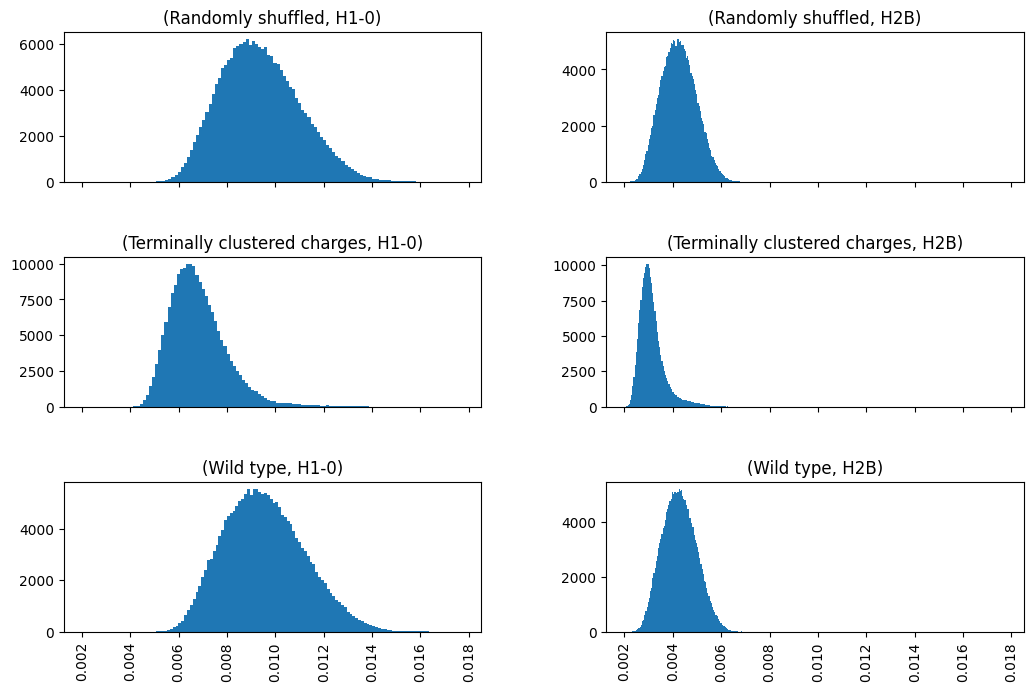

In [6]:
# Plotting Rg distributions
data = data.explode('Rg')
data['Rg'] = data['Rg'].astype(float)

# Plotting distributions
data.hist(column='Rg', by=['variant', 'template'], layout=(3,2), sharex=True, figsize=(12,8), bins=100)

# Calculating means
print("MEAN VALUES OF Rg")
print(data.groupby(by=['template', 'variant'])['Rg'].mean())

## Histone H1.0 Orthologs

### Phylogenetic analysis

In [10]:
# Creating assembly of full-length sequences for analysis
with open("exp/ortho/ortho.json", 'r') as file:
    metadata = json.load(file)

ids = metadata['templates'].keys()
species = [metadata['templates'][id]['species'] for id in ids]
sequences = [metadata['templates'][id]['sequence'] for id in ids]

with open("exp/ortho/results/phylogeny/full_length.fasta", 'w') as file:
    for spec, seq in zip(species, sequences):
        file.write('>' + spec + '\n')
        file.write(seq + '\n')

In [11]:
# Creating assembly of IDR sequences for analysis
with open("exp/ortho/ortho.json", 'r') as file:
    metadata = json.load(file)

ids = metadata['data'].keys()
species = [metadata['templates'][id]['species'] for id in ids]
sequences = [metadata['data'][id]['sequence'] for id in ids]

with open("exp/ortho/results/phylogeny/idr.fasta", 'w') as file:
    for spec, seq in zip(species, sequences):
        file.write('>' + spec + '\n')
        file.write(seq + '\n')